In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns

In [167]:
# Loading Dataset
df = pd.read_csv('Fraud_check.csv')

In [168]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [169]:
inputs = df.drop('Taxable.Income',axis='columns')
inputs

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO
...,...,...,...,...,...
595,YES,Divorced,39492,7,YES
596,YES,Divorced,55369,2,YES
597,NO,Divorced,154058,0,YES
598,YES,Married,180083,17,NO


In [170]:
df1=inputs.rename({'Undergrad':'Undergrad','Marital.Status':'MaritalStatus','City.Population':'CityPopulation','Work.Experience':'WorkExperience','Urban':'Urban'}, axis=1)
df1

,Undergrad,MaritalStatus,CityPopulation,WorkExperience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO
...,...,...,...,...,...
595,YES,Divorced,39492,7,YES
596,YES,Divorced,55369,2,YES
597,NO,Divorced,154058,0,YES
598,YES,Married,180083,17,NO


In [171]:
target = df['Taxable.Income']
target

0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: Taxable.Income, Length: 600, dtype: int64

In [172]:
from sklearn.preprocessing import LabelEncoder
le_Undergrad= LabelEncoder()
le_MaritalStatus = LabelEncoder()
le_CityPopulation = LabelEncoder()
le_WorkExperience = LabelEncoder()
le_Urban = LabelEncoder()

In [173]:
df1['Undergrad'] = le_Undergrad.fit_transform(df1['Undergrad'])
df1['MaritalStatus'] = le_MaritalStatus.fit_transform(df1['MaritalStatus'])
#inputs['CityPopulation'] = le_CityPopulation.fit_transform(inputs['CityPopulation'])
#inputs['WorkExperience'] = le_WorkExperience.fit_transform(inputs['WorkExperience'])
df1['Urban'] = le_Urban.fit_transform(df1['Urban'])

In [174]:
df1

,Undergrad,MaritalStatus,CityPopulation,WorkExperience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [175]:
#inputs_n = df1.drop(['MaritalStatus'],axis='columns')

In [176]:
#inputs_n

In [177]:
target

0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: Taxable.Income, Length: 600, dtype: int64

In [178]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [179]:
model.fit(df1, target)

DecisionTreeClassifier()

In [180]:
model.score(df1,target)

1.0

In [181]:
model.predict([[0,2,50047,10,1]])

array([68833], dtype=int64)

In [212]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
df1['Predict'] = pd.cut(x = df['Taxable.Income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
df1

,Undergrad,MaritalStatus,CityPopulation,WorkExperience,Urban,Predict
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good
...,...,...,...,...,...,...
595,1,0,39492,7,1,Good
596,1,0,55369,2,1,Good
597,0,0,154058,0,1,Good
598,1,1,180083,17,0,Good


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Predict', ylabel='count'>

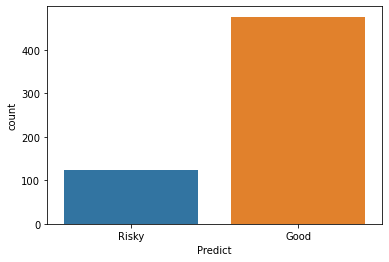

In [213]:
sns.countplot(df1['Predict'])

In [214]:
df1['Predict'].value_counts()

Good     476
Risky    124
Name: Predict, dtype: int64

In [225]:
#le_Predict= LabelEncoder()
label_encoder = preprocessing.LabelEncoder()
df1['Predict'] = label_encoder.fit_transform(df1['Predict'])

In [226]:
x=df1
y=df1['Predict']
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Predict, Length: 600, dtype: int32

In [227]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.32,random_state=40)

# Building Decision Tree Classifier using Entropy Criteria

In [228]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

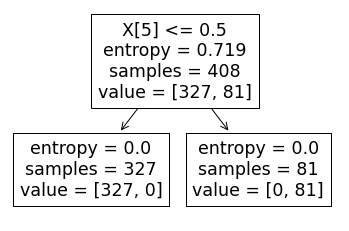

In [236]:
#PLot the decision tree
tree.plot_tree(model);

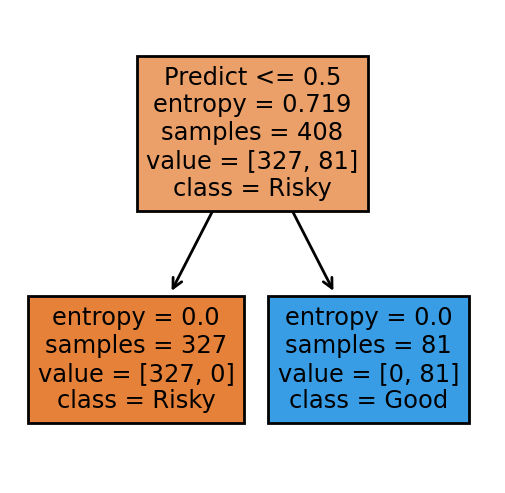

In [238]:
fn=['Undergrad', 'MaritalStatus', 'CityPopulation', 'WorkExperience',
       'Urban','Predict']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=200)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [239]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    149
1     43
dtype: int64

In [241]:
preds

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0])

In [242]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Predict,,
0,149,0
1,0,43


In [243]:
# Accuracy 
np.mean(preds==y_test)

1.0

# Building Decision Tree Classifier (CART) using Gini Criteria

In [244]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [245]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [246]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

1.0

# Decision Tree Regression Example

In [247]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [248]:
array = df1.values
X = array[:,0:3]
y = array[:,3]

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [253]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [254]:
#Find the accuracy
model.score(X_test,y_test)

-1.2355868619657437